In [1]:
from image_generation import generate_test_image
from conjugate_gradient import cg_main
import numpy as np
import matplotlib.pyplot as plt


Running for k = 6, N = 64, reg = 16.000

Running for k = 7, N = 128, reg = 64.000

Running for k = 8, N = 256, reg = 256.000

Running for k = 9, N = 512, reg = 1024.000

Elapsed times (seconds):
k = 6: 0.1014 s
k = 7: 0.2465 s
k = 8: 2.5001 s
k = 9: 51.9182 s


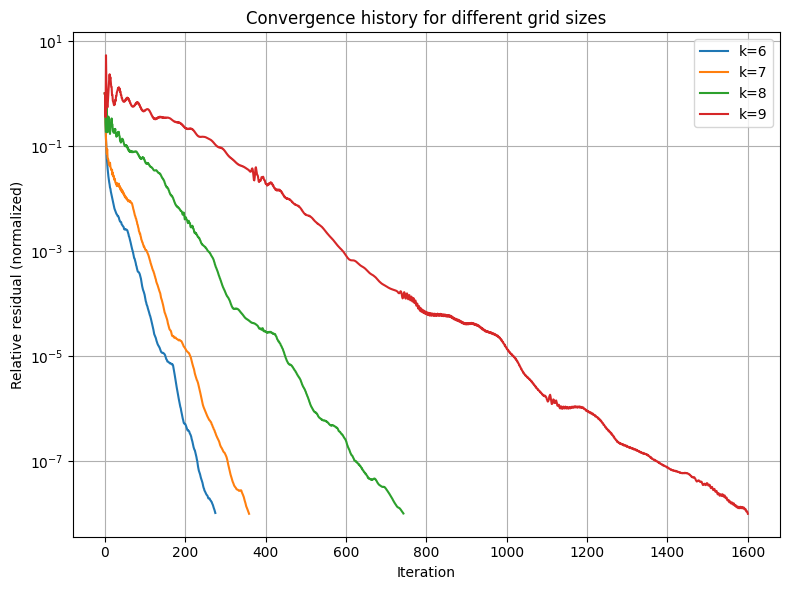

In [ ]:
ks = range(6, 10)

# Storage
times = []
residuals = []

for k in ks:
    reg = 4 ** (k - 4)
    N = 2 ** k

    # Generate synthetic image pair
    I1, I2 = generate_test_image(N, testcase=1)

    # Run CG solver
    u, v, res, max_iter, elapsed_time = cg_main(I1, I2, reg)

    # Normalize residuals by their first entry
    res = np.array(res) / res[0]

    # Store data
    times.append(elapsed_time)
    residuals.append(res)

# Print timing results
print("\nElapsed times (seconds):")
for k, t in zip(ks, times):
    print(f"k = {k}: {t:.4f} s")

# Plot all residual histories together
plt.figure(figsize=(8, 6))
for k, res in zip(ks, residuals):
    plt.plot(res, label=f"k={k}")

plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Relative residual (normalized)")
plt.title("Convergence history for different grid sizes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
def convergence_plot(method_name, testcase=1, ks=range(6, 10), **kwargs):
    """
    Run one optical flow solver for several grid sizes and plot convergence curves.

    Parameters
    ----------
    method_name : str
        Solver method name ('cg', 'jacobi', 'gs').
    testcase : int
        Which synthetic image pair to use (1 or 2).
    ks : iterable
        Exponents controlling grid size (N = 2**k).
    **kwargs :
        Extra solver parameters (e.g. tol=1e-8, maxit=2000).

    Returns
    -------
    times : list of float
        Elapsed time for each grid size.
    residuals : list of np.ndarray
        Residual histories for each grid size.
    """
    times = []
    residuals = []

    for k in ks:
        reg = 4 ** (k - 4)
        N = 2 ** k

        # Generate synthetic test images
        I1, I2 = generate_test_image(N, testcase=testcase)

        # Choose solver
        if method_name.lower() == "cg":
            u, v, res, max_iter, elapsed_time = cg_main(I1, I2, reg, **kwargs)
        elif method_name.lower() == "jacobi":
            u, v, res, max_iter, elapsed_time = jacobi_main(I1, I2, reg, **kwargs)
        elif method_name.lower() in {"gs", "gauss_seidel"}:
            u, v, res, max_iter, elapsed_time = gs_main(I1, I2, reg, **kwargs)
        else:
            raise ValueError(f"Unknown method '{method_name}'")

        # Normalize residuals by first entry
        res = np.array(res) / res[0]
        residuals.append(res)
        times.append(elapsed_time)

    # Print timing results
    print(f"\n[{method_name.upper()}] Elapsed times (seconds):")
    for k, t in zip(ks, times):
        print(f"  k = {k}: {t:.4f} s")

    # Plot convergence curves
    plt.figure(figsize=(8, 6))
    for k, res in zip(ks, residuals):
        plt.plot(res, label=f"k={k}")
    plt.yscale('log')
    plt.xlabel("Iteration")
    plt.ylabel("Relative residual (normalized)")
    plt.title(f"Convergence history ({method_name.upper()}), testcase {testcase}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return times, residuals


# ------------------------------------------------------------

def convergence_subplot(methods, testcase=1, ks=range(6, 10), **kwargs):
    """
    Run several solver methods and show their convergence histories side by side.

    Parameters
    ----------
    methods : list of str
        e.g. ['cg', 'jacobi', 'gs']
    testcase : int
        Which image pair to use (1 or 2).
    ks : iterable
        Exponents controlling grid size (N = 2**k).
    """
    fig, axs = plt.subplots(1, len(methods), figsize=(6 * len(methods), 5), sharey=True)

    for i, method in enumerate(methods):
        times, residuals = convergence_plot(method, testcase, ks, **kwargs)

        for k, res in zip(ks, residuals):
            axs[i].plot(res, label=f"k={k}")
        axs[i].set_yscale('log')
        axs[i].set_xlabel("Iteration")
        axs[i].set_title(f"{method.upper()}")
        axs[i].grid(True)
        axs[i].legend()
        if i == 0:
            axs[i].set_ylabel("Relative residual (normalized)")

    plt.suptitle(f"Convergence comparison (testcase {testcase})")
    plt.tight_layout()
    plt.show()



[CG] Elapsed times (seconds):
  k = 6: 0.0973 s
  k = 7: 0.2556 s
  k = 8: 2.1258 s
  k = 9: 47.3121 s


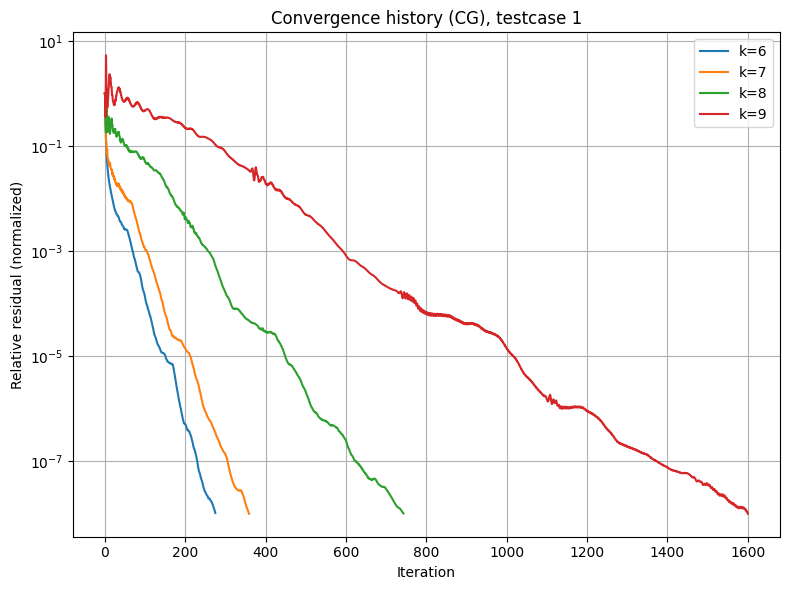

([0.09726810455322266,
  0.25557947158813477,
  2.1257505416870117,
  47.3121018409729],
 [array([1.00000000e+00, 1.00000000e+00, 2.64755602e-01, 1.34720498e-01,
         8.50393272e-02, 6.00037397e-02, 4.59988428e-02, 3.72080006e-02,
         3.08878799e-02, 2.62883589e-02, 2.30578758e-02, 2.03354245e-02,
         1.84462281e-02, 1.61234781e-02, 1.53938545e-02, 1.36051492e-02,
         1.25124947e-02, 1.16993667e-02, 1.07965500e-02, 9.54592642e-03,
         8.89267758e-03, 8.24943451e-03, 7.70945500e-03, 6.88883988e-03,
         6.44985869e-03, 6.15486569e-03, 5.80004139e-03, 5.65454544e-03,
         5.40445216e-03, 5.09598998e-03, 4.99731617e-03, 4.83535071e-03,
         4.63011061e-03, 4.66019249e-03, 4.48071817e-03, 4.32248484e-03,
         4.01409009e-03, 3.83923136e-03, 3.64223517e-03, 3.60142849e-03,
         3.59814880e-03, 3.47968091e-03, 3.22679086e-03, 3.15900026e-03,
         3.08656665e-03, 2.97508352e-03, 2.93413602e-03, 2.84788060e-03,
         2.62045181e-03, 2.57830457

In [ ]:
convergence_plot("cg", testcase=1, ks=range(6, 10))
print() 